## Olá a todas(os), esse notebook foi escrito com intuíto de apresentar um portfólio robusto com o que considero importante para uma boa análise de negócios. 
### Aqui você encontrará pontos que considero essenciais: uma boa documentação, análises matemáticas aprofundadas, meu olhar sobre negócios e uma identidade visual em uma boa estrutura.
### Buscarei sempre estar aprofundando nesses pontos e tentarei manter atualizado, sintam-se a vontade para comentar e contribuir com o que julgarem construtivo.


<p aligh="center">O Dataset foi retirado do <a href="https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce" target="_blank">Kaggle</a>, contendo dados de e-commerce da Olist Store, possuí informação de mais de 100 mil pedidos de 2016 a 2018, feitos em múltiplos marketplaces brasileiros. Possuí diversas dimensões: Status do pedido, Preço, Pagamento, Dados de Frete, tornando o Dataset um bom projeto para se trabalhar as ferramentas para demonstrar meus conhecimentos como Analista de Dados Comercial. Será utilizado Python para a transformação e contrução de um relatório combinado com o Power BI para a apresentação dos dados para diversos públicos.</p>

<p aligh= "center">Para uma melhor compreensão dos desafios o Dataset apresenta dados duplicados, diversas tabelas (Pedidos, Produtos, Clientes, Pagamentos, etc...), permitindo que seja trabalhado os relacionamentos e gráficos dentro do Power BI, mas também que a limpeza, análise de outliers, construção de novos KPIs, realização de análises e entendimento dos números utilizando o Python, trazendo uma robustez e velocidade nas análises, o que difere no uso do famoso Excel ou somente do uso da DAX para o tratamento dos mesmos. Ambas as ferramentas, apesar de serem amplamente usadas e conhecidas, não são eficientes quando se olha para a ótica da integração, serviços em nuvem, capacidade de processamento e flexibilidade, quando comparadas com o Python. Exatamente por isso segui esse caminho, levando em conta o grande volume de informações que e-commerces recolhem dos clientes.</p>

<p aligh= "center">Para uma melhor visualização de como está organizado as informações do Dataset, seguem as imagens a seguir:</p>
<a href="C:\Users\diogo\OneDrive\Documentos\Profissional\Portfolio\analise_comercial\ecommerce_case\imagens\organizacao_dataset.png">
    <img src="./imagens/organizacao_dataset.png" alt="Meu gráfico" width="900">
</a>

### 1.1 Sem mais começarei o relatório seguindo o formato: Resumo executivo, Lista de variáveis e explicação, Bibliotecas usadas e configuração de ambiente , Limpeza e transformação, Análise Exploratória, Insights e Conclusões


## Resumo Executivo

## Lista de variáveis

**DataFrame `df_clientes`** (extraído de arquivo CSV)
- **Colunas**:
  - **`customer_id`**  
    *Descrição*: Atributo em string que representa uma compra realizada pelo cliente.
  
  - **`customer_unique_id`**  
    *Descrição*: Atributo em UUID que representa o cliente específico.  
    *Observação*: Há valores repetidos no dataframe.

  - **`customer_zip_code_prefix`**  
    *Descrição*: Atributo int que representa o prefixo do CEP (apenas a cidade).  
    *Tratamento*: Será transformado em uma tabela separada para normalização (3FN).

  - **`customer_city`**  
    *Descrição*: Atributo em string com a cidade do cliente (formato padronizado, sem caracteres especiais).  
    *Análise*: Verificar divergências entre compras e possíveis mudanças de cidade (mudança de cadastro).  
    *Tratamento*: Será movido para uma nova tabela (3FN).  
    *Observação*: *"Ideia: consigo trabalhar com uma biblioteca pronta de CEPs?"*

  - **`customer_state`**  
    *Descrição*: Atributo em string com a sigla do estado (sem caracteres especiais).  
    *Tratamento*: Será transformado em uma tabela separada para normalização (3FN).

- **Variáveis Criadas**
  - **`clientes_unicos_recorrentes`**
    *Descrição*: Variável que conta quantas vezes o cliente apareceu através da coluna  *customer_unique_id* e o método * .value_counts()* é armazenada em formada de **lista**
  - **`quantidade_clientes_recorrentes`**
    *Descrição*: Variável que guarda a quantidade de clientes que aparecem mais de uma vez, utiliza a variável *clientes_unicos_recorrentes* o operador lógico `>` e o método *.sum()*
  - **`count_cidades`**
    *Descrição*: Variável que guarda a quantidade de cidades diferentes que aparecem no dataframe de clientes, utiliza o método .nunique()
  - **`porcentagem_cobertura`**
    *Descrição*: Variável que fornece a porcentagem de penetração de mercado, utiliza a variável *count_cidades* e divide pelo número de municípios brasileiros
  - **`top_10_estados_clientes`**
    *Descrição*: Variável que guarda uma lista dos 10 estados com maior quantidade de clientes, criada a partir *df_clientes['customer_state']* e o método .value_counts().head(10)
  - **`lista_produtos_nulos`**
    *Descrição*: Variável que guarda uma lista dos produtos que não possuem categoria e outras informações, criada a partir do *df_produtos[df_produtos['product_category_name'].isna()]['product_id'].to_list()* e os métodos .isna() e .to_list() 
  



## Bibliotecas usadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Limpeza e transformação

In [2]:
df_clientes = pd.read_csv("C:\\Users\\diogo\\OneDrive\\Documentos\\Profissional\\Portfolio\\analise_comercial\\datasets\\olist_customers_dataset.csv", encoding= 'utf-8')
df_geolocalizacao = pd.read_csv("C:\\Users\\diogo\\OneDrive\\Documentos\\Profissional\\Portfolio\\analise_comercial\\datasets\\olist_geolocation_dataset.csv")
df_itens_comprados = pd.read_csv("C:\\Users\\diogo\\OneDrive\\Documentos\\Profissional\\Portfolio\\analise_comercial\\datasets\\olist_order_items_dataset.csv")
df_pagamentos = pd.read_csv("C:\\Users\\diogo\\OneDrive\\Documentos\\Profissional\\Portfolio\\analise_comercial\\datasets\\olist_order_payments_dataset.csv")
df_reviews = pd.read_csv("C:\\Users\\diogo\\OneDrive\\Documentos\\Profissional\\Portfolio\\analise_comercial\\datasets\\olist_order_reviews_dataset.csv")
df_entregas = pd.read_csv("C:\\Users\\diogo\\OneDrive\\Documentos\\Profissional\\Portfolio\\analise_comercial\\datasets\\olist_orders_dataset.csv")
df_produtos = pd.read_csv("C:\\Users\\diogo\\OneDrive\\Documentos\\Profissional\\Portfolio\\analise_comercial\\datasets\\olist_products_dataset.csv")
df_vendedores = pd.read_csv("C:\\Users\\diogo\\OneDrive\\Documentos\\Profissional\\Portfolio\\analise_comercial\\datasets\\olist_sellers_dataset.csv")
df_categorias = pd.read_csv("C:\\Users\\diogo\\OneDrive\\Documentos\\Profissional\\Portfolio\\analise_comercial\\datasets\\product_category_name_translation.csv")

In [3]:
# Checando o formato dos datasets
df_clientes.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [4]:
df_geolocalizacao.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [5]:
df_itens_comprados.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [6]:
df_pagamentos.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [7]:
df_reviews.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [8]:
df_entregas.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [9]:
df_produtos.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [10]:
df_vendedores.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


In [11]:
# Podemos notar que esse dataset não será usado, portanto poderá ser excluído ao ser trabalhado no Power BI
df_categorias.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [12]:
# Aprofundando no dataset, as análises a seguir serão para entender os tipos dos dados (inteiro, float, date, strings, etc...)
# checar os valores nulos, duplicados e o funcionamento de cada uma das colunas para buscar entender os comportamentos dos números

df_clientes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [30]:
# não há nenhum valor nulo, a categoria CEP é numérica e todas as outras são strings, para trabalhar com banco de dados podemos eliminar cidade e estado, ficando apenas
# com o CEP, mantendo-se assim as 3 Formas Normais em um banco de dados. Irei me aprofundar mais a frente nesse ponto.

# Observação de colunas
print(f"O número de linhas duplicadas é: {df_clientes.duplicated().sum()}")
print("O número de id_clientes únicos é:", df_clientes['customer_id'].nunique())
print("O número de ids unicos dos clientes é:", df_clientes["customer_unique_id"].nunique())


O número de linhas duplicadas é: 0
O número de id_clientes únicos é: 99441
O número de ids unicos dos clientes é: 96096


In [14]:
# Percebe-se que há uma diferença entre os os customer_id e customer_unique_id, sendo uma diferença estatisticamente relevante, analisando mais profundamente:

df_clientes[df_clientes["customer_unique_id"] == "a40096fc0a3862e9e12bc55b5f8e6ab2"]

# Possivelmente a coluna customer_id sejá uma coluna que represente compras recorrentes

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
197,eee74b2a9aa0989243d2793c1a90fbf6,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1463,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
35912,039bbed64cc5e2160b7ca4ac6b09449c,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ


In [15]:
# Checando se é:

print(df_entregas[df_entregas['customer_id'] == 'eee74b2a9aa0989243d2793c1a90fbf6'])
print(df_entregas[df_entregas['customer_id'] == '9f6f3da49e2d46e3a7529f5e3c25ecce'])
print(df_entregas[df_entregas['customer_id'] == '039bbed64cc5e2160b7ca4ac6b09449c'])



                              order_id                       customer_id  \
5236  d839ea07a528e914f89702508023da37  eee74b2a9aa0989243d2793c1a90fbf6   

     order_status order_purchase_timestamp    order_approved_at  \
5236    delivered      2017-10-11 14:49:49  2017-10-11 15:08:32   

     order_delivered_carrier_date order_delivered_customer_date  \
5236          2017-10-13 21:09:03           2017-10-17 21:56:01   

     order_estimated_delivery_date  
5236           2017-11-03 00:00:00  
                               order_id                       customer_id  \
98265  aec47b9987c836ffee2d7664b0929ec1  9f6f3da49e2d46e3a7529f5e3c25ecce   

      order_status order_purchase_timestamp    order_approved_at  \
98265    delivered      2017-10-10 18:31:36  2017-10-10 18:49:10   

      order_delivered_carrier_date order_delivered_customer_date  \
98265          2017-10-13 17:07:01           2017-10-20 18:29:16   

      order_estimated_delivery_date  
98265           2017-11-17 00:00:00 

In [16]:
# Pode-se ver que o cliente fez compras recorrentes no site, porém vamos checar se o mesmo ID se repete:
print(df_entregas.shape[0])
df_entregas['customer_id'].nunique()

# Pelos resultados infere-se que para cada compra é gerado um customer_id novo, sendo o customer_unique_id
# o id do cliente

99441


99441

In [17]:
# Então temos: 

clientes_unicos_recorrentes = df_clientes['customer_unique_id'].value_counts()
quantidade_clientes_recorrentes = (clientes_unicos_recorrentes > 1).sum()
porcentagem_recorrentes = quantidade_clientes_recorrentes/df_clientes.shape[0]
print(f"A quantidade de clientes recorrentes é: {quantidade_clientes_recorrentes}, e representa: {porcentagem_recorrentes}% dos clientes")


A quantidade de clientes recorrentes é: 2997, e representa: 0.030138474070051588% dos clientes


In [18]:
# Pelos resultados anteriores notamos que é uma porcentagem muito baixa, devendo assim investigar o porque
# será feita essas análises posteriormente.

# Para outras colunas seguindo o mesmo raciocínio temos:

count_cidades = df_clientes['customer_city'].nunique()
count_cidades
num_municipios = 5571 # [fonte]("https://pt.wikipedia.org/wiki/Munic%C3%ADpios_do_Brasil")
porcentagem_cobertura = count_cidades/num_municipios
print(f"A Olist cobre {porcentagem_cobertura}% dos municípios do Brasil")

# Mostrando a cobertura é muito grande o que traz problemas altamente completos devido ao tamanho do território brasileiro
# e a nossa diversidade.

A Olist cobre 0.7393645665051157% dos municípios do Brasil


In [19]:
# Dado um volume tão grande de municípios, há problemas de municípios escritos errados?

df_clientes['customer_city'].unique()

# Aparentemente não, e os valores foram escritos sem usar acentos

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [20]:
# Agora vamos analisar os estados, para ver se há algum erro de escrita ou se há algum estado que não está presente no dataset
# e que poderia ser interessante para o Olist abrir um centro de distribuição
# ou um centro de atendimento, para melhorar a logística e o atendimento ao cliente.
# Para isso, vamos verificar a quantidade de estados únicos e a porcentagem de cobertura dos estados do Brasil

df_clientes['customer_state'].value_counts(normalize=True).head(10)

customer_state
SP    0.419807
RJ    0.129242
MG    0.117004
RS    0.054967
PR    0.050734
SC    0.036574
BA    0.033990
DF    0.021520
ES    0.020444
GO    0.020314
Name: proportion, dtype: float64

In [22]:
top_10_estados_clientes = df_clientes['customer_state'].value_counts(normalize=True).head(10)
top_10_estados_clientes = top_10_estados_clientes.reset_index()

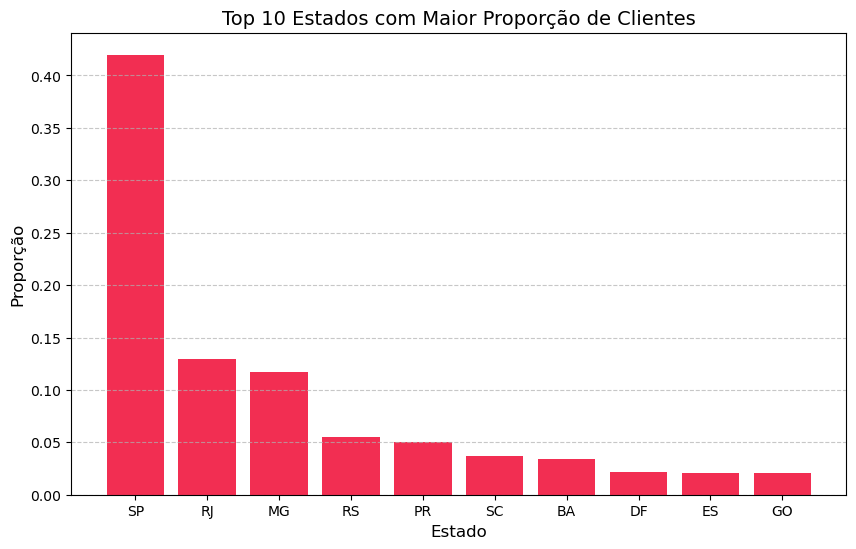

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_estados_clientes['customer_state'], top_10_estados_clientes['proportion'], color='#F22E52')
plt.title('Top 10 Estados com Maior Proporção de Clientes', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Proporção', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [24]:
top_10_cidades_clientes = df_clientes['customer_city'].value_counts(normalize=True).head(10)
top_10_cidades_clientes = top_10_cidades_clientes.reset_index()

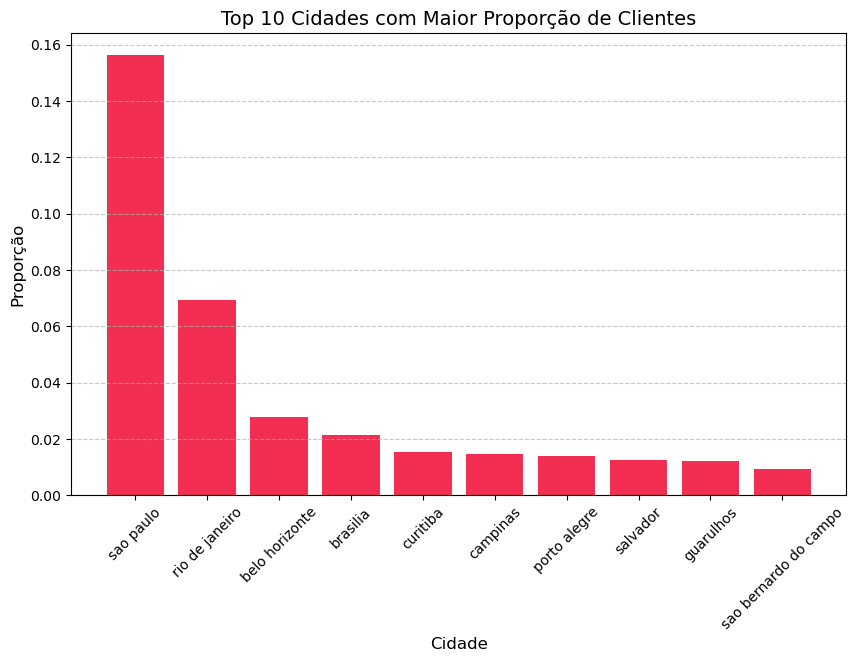

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_cidades_clientes['customer_city'], top_10_cidades_clientes['proportion'], color='#F22E52')
plt.title('Top 10 Cidades com Maior Proporção de Clientes', fontsize=14)
plt.xlabel('Cidade', fontsize=12)
plt.ylabel('Proporção', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [26]:
# Podemos notar que a maioria dos clientes estão concentrados em São Paulo, o que pode ser um ponto positivo para o Olist, pois a logística é mais fácil e rápida
# na região sudeste, onde a maioria dos clientes estão concentrados.
#Também nota-se que a maioria dos clientes estão concentrados em cidades grandes, o que pode ser um ponto positivo para o Olist, pois a logística é mais fácil e rápida
# na região sudeste, onde a maioria dos clientes estão concentrados. Além da porporção ser menos concentrada nas cidades, mostrando uma penetração grande
# no território brasileiro, possibilitando um crescimento maior ainda.

# Aprofundando em uma dúvida, checarei se há prefixos diferentes dentro das cidades, somente para ver se há alguma possibilidade de posteriormente
# tentar criar um mapa de calor das cidades, para ver a concentração de clientes nas regiões das cidades. 

df_clientes[df_clientes['customer_city'] == 'sao paulo']['customer_zip_code_prefix'].unique()

# Como há prefixos diferentes, poderemos trabalhar nessas informações, tentarei criar através do geopandas.


array([1151, 4534, 5704, ..., 4319, 3727, 5538], dtype=int64)

In [ ]:
# Trabalhando agora com o dataframe de produtos
df_produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [35]:
# Já percebe-se que há valores nulos em todas as linhas exceto no product_id, e que a maioria das colunas são strings, com exceção da coluna de preço e de peso.
# Vamos verificar os valores nulos e duplicados:
print(f"O número de linhas duplicadas é: {df_produtos.duplicated().sum()}")
print("O número de product_id únicos é:", df_produtos['product_id'].nunique())
df_produtos.isna().sum()

O número de linhas duplicadas é: 0
O número de product_id únicos é: 32951


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [38]:
# Podemos notar que há um número considerável de valores nulos, o que pode ser um problema para a análise.
# Aprofundando mais, vamos verificar os valores nulos de cada coluna e descobrir se há alguma relação entre eles.

df_produtos[df_produtos['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [46]:
# Percebemos que para os produtos que não possuem categoria, tammbém não há nome, descrição e fotos. 
# Salvarei a lista desses produtos em uma lista para posteriormente analisar se há vendas. Por ser um e-commerce, há a possibilidade desses dados não terem sido inseridos corretamente por não exigirem ao cadastrar o produto.
# Também há a possibilidade de serem produtos que não estão mais disponíveis para venda, o que pode ser um problema para a análise.
lista_produtos_nulos = df_produtos[df_produtos['product_category_name'].isna()]['product_id'].to_list()

['a41e356c76fab66334f36de622ecbd3a',
 'd8dee61c2034d6d075997acef1870e9b',
 '56139431d72cd51f19eb9f7dae4d1617',
 '46b48281eb6d663ced748f324108c733',
 '5fb61f482620cb672f5e586bb132eae9',
 'e10758160da97891c2fdcbc35f0f031d',
 '39e3b9b12cd0bf8ee681bbc1c130feb5',
 '794de06c32a626a5692ff50e4985d36f',
 '7af3e2da474486a3519b0cba9dea8ad9',
 '629beb8e7317703dcc5f35b5463fd20e',
 '3a78f64aac654298e4b9aff32fc21818',
 'bcb815bba008d89458e428078c0b9211',
 '6b82874c6b51b92913dcdb364eaaae0f',
 'c68b419d9c6038271b85bac98adb0fc9',
 '1dcd65bb5dd967d7b4c6b0223cefb838',
 '671446e8e3aa3df1eca47b6c354a2921',
 'f0ea71b6e2ab4cb3bd8f5ba522a25a56',
 'fedccbd5e370e8ddb7aae6fb4cb70347',
 '212cc0fa7359ab242a697a03a574f719',
 '6b7879a37ac2dbe5289a16706e859870',
 '44e8945e17aef03daaecbc4bbab7f730',
 '3abf2d4698bf245577543ea01d9c7f16',
 'ca26080d8f0fa848c329fe732f5e34e8',
 '1a2ece70966710dec441aa587993b5b4',
 '5f4bceafafc1903556735cb7f2842e78',
 'b61d1388a17e3f547d2bc218df02335b',
 'b9adb2d8377c195da59e75743dbb7133',
 